# Clustering: Pass Accuracy vs Passes Made Under Pressure

I am going to use k-means clustering to group Premier League players based on two features: pass accuracy, and percentage of passes made under pressure.

In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

pd.options.display.max_columns = None
pd.options.display.max_rows = None

# load squad passing data
squad_pass_data = pd.read_csv("../data/Premier-League-Stats_squad_passing_types.csv", index_col="squad")
squad_pass_data = squad_pass_data.rename(columns={"passes": "squad_passes"})

# load data and filter based on game time (630+ mins minimum) and position (no GKs)
player_pass_data = pd.read_csv("../data/Premier-League-Stats_players_passing_types.csv", index_col=0)
player_pass_data = player_pass_data[(player_pass_data['minutes_90s'] > 7) & (player_pass_data['position'] != 'GK')]
player_pass_data.head()

,squad,minutes_90s,passes_completed,through_balls,position,player,passes,passes_pressure
0,Crystal Palace,26.9,1188,0,DF,Patrick van Aanholt,1512,218
1,Norwich City,33.0,1243,1,DF,Max Aarons,1586,273
2,Chelsea,24.1,284,0,FW,Tammy Abraham,404,143
3,Southampton,10.6,156,2,FW,Che Adams,227,57
5,Manchester City,16.1,284,5,FW,Sergio Agüero,367,90


In [210]:
# create pass accuracy, % of passes under pressure columns
player_pass_data['pass_accuracy'] = player_pass_data['passes_completed']/player_pass_data['passes']
player_pass_data['passes_pressure_pct'] = player_pass_data['passes_pressure']/player_pass_data['passes']
player_pass_data['through_balls_pct'] = player_pass_data['through_balls']/player_pass_data['passes']

player_squad = player_pass_data['squad']
squad_pass_df = squad_pass_data.loc[player_squad]['squad_passes'].to_frame()
squad_pass_df

,squad_passes
squad,
Crystal Palace,14562
Norwich City,17234
Chelsea,22466
Southampton,15081
Manchester City,25367
Bournemouth,14992
Leicester City,19460
Tottenham,18390
Liverpool,22988


In [138]:
# generate and fit clustering model
km = KMeans(n_clusters=5, init='random', random_state=0)

y_km = km.fit_predict(player_pass_data[['pass_accuracy', 'passes_pressure_pct', 'through_balls_pct']])

# link clusters to dataframe
player_pass_data['Cluster'] = y_km
player_pass_data[player_pass_data['Cluster'] == 1].sort_values(by=['passes_pressure_pct'])

,passes_completed,passes,through_balls,position,player,minutes_90s,passes_pressure,pass_accuracy,passes_pressure_pct,through_balls_pct,Cluster
317,780,1025,4,"MF,FW",Aaron Mooy,22.0,221,0.760976,0.215610,0.003902,1
499,437,583,6,"MF,FW",Harry Wilson,17.6,128,0.749571,0.219554,0.010292,1
495,1165,1494,4,FW,Willian,27.2,329,0.779786,0.220214,0.002677,1
296,541,716,3,MF,John McGinn,22.7,158,0.755587,0.220670,0.004190,1
355,568,745,3,FW,Nicolas Pépé,20.2,168,0.762416,0.225503,0.004027,1
299,1243,1584,4,MF,Kenny McLean,30.0,358,0.784722,0.226010,0.002525,1
147,425,544,1,DF,Simon Francis,10.8,123,0.781250,0.226103,0.001838,1
270,899,1112,4,MF,John Lundstram,25.6,254,0.808453,0.228417,0.003597,1
278,388,524,0,"FW,DF",Solly March,10.7,121,0.740458,0.230916,0.000000,1
53,836,1111,3,MF,Philip Billing,25.9,259,0.752475,0.233123,0.002700,1


In [135]:
# plot clusters
from matplotlib.pyplot import figure

def plot_clusters(xAxis, yAxis, x_label=None, y_label=None):
    print(xAxis)
    figure(figsize=(10,6))
    plt.scatter(player_pass_data[player_pass_data['Cluster']==0][xAxis], player_pass_data[player_pass_data['Cluster']==0][yAxis], s=40, c='red', label ='Cluster 1')
    plt.scatter(player_pass_data[player_pass_data['Cluster']==1][xAxis], player_pass_data[player_pass_data['Cluster']==1][yAxis], s=40, c='blue', label ='Cluster 2')
    plt.scatter(player_pass_data[player_pass_data['Cluster']==2][xAxis], player_pass_data[player_pass_data['Cluster']==2][yAxis], s=40, c='green', label ='Cluster 3')
    plt.scatter(player_pass_data[player_pass_data['Cluster']==3][xAxis], player_pass_data[player_pass_data['Cluster']==3][yAxis], s=40, c='pink', label ='Cluster 4')
    plt.scatter(player_pass_data[player_pass_data['Cluster']==4][xAxis], player_pass_data[player_pass_data['Cluster']==4][yAxis], s=40, c='gold', label ='Cluster 5')
    
    plt.xlabel(x_label) if x_label else plt.xlabel(xAxis)
    plt.ylabel(y_label) if y_label else plt.ylabel(yAxis)    
    plt.legend() 
    

pass_accuracy


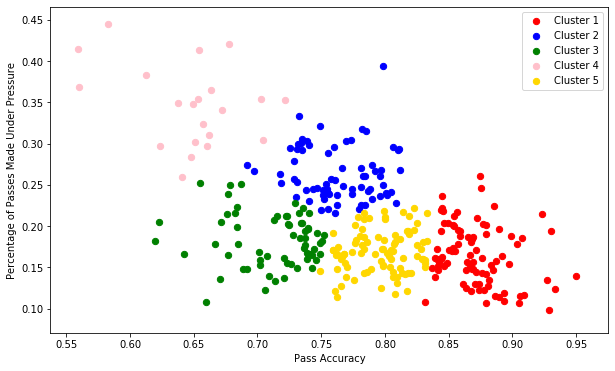

In [136]:
plot_clusters('pass_accuracy', 
              'passes_pressure_pct', 
              x_label="Pass Accuracy", 
              y_label="Percentage of Passes Made Under Pressure"
             )